In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run additional.ipynb

In [3]:
pandas.set_option('display.max_colwidth', 120)

In [4]:
PROFILE = 'ssh-ipy'

# HLT1 2-body classifier

did preselections:

* sv.n == 2, 
* sv.minpt >= 500 

## Training channels (read data)

We will use all possible

In [5]:
bck_train_mode_name = 30000000
sig_train_modes_names = list(set(empty_events.keys()) - {bck_train_mode_name})
sig_train_files = ['mod_{}.csv'.format(name) for name in sig_train_modes_names]
bck_train_files = 'mod_30000000.csv'
folder = "datasets/prepared_hlt_body/"

In [6]:
# concat all signal data
if not os.path.exists(folder + 'signal_hlt1.csv'):
    concat_files(folder, sig_train_files, os.path.join(folder , 'signal_hlt1.csv'))

In [7]:
signal_data = pandas.read_csv(os.path.join(folder, 'signal_hlt1.csv'), sep='\t')
bck_data = pandas.read_csv(os.path.join(folder, bck_train_files), sep='\t')

In [8]:
signal_data.columns

Index([u'unique', u'mode', u'event_number', u'sv_number', u'pass_2body', u'pass_nbody', u'signal', u'sumpt', u'm', u'mcor', u'ipchi2', u'chi2', u'sumipchi2', u'fdr', u'nlt16', u'minpt', u'eta', u'pt', u'nmu', u'n', u'fdchi2', u'maxtchi2', u'ngood', u'nmu1', u'mupt', u'n1trk', u'sig', u'idx'], dtype='object')

## Counting events and svrs,
that passed **L0** and **GoodGenB** preselection (this data was generated by skim)

In [9]:
print 'Signal', statistic_length(signal_data)
print 'Bck', statistic_length(bck_data)

Signal {'SVR': 28773384, 'Events': 560508}
Bck {'SVR': 408147, 'Events': 38035}


In [10]:
total_bck_events = statistic_length(bck_data)['Events'] + empty_events[bck_train_mode_name]
total_signal_events_by_mode = dict()
for mode in sig_train_modes_names:
    total_signal_events_by_mode[mode] = statistic_length(signal_data[signal_data['mode'] == mode])['Events'] + empty_events[mode]

### events distribution by mode

In [11]:
print 'Bck:', total_bck_events
'Signal:', total_signal_events_by_mode

Bck: 111306


('Signal:',
 {11102003: 22317,
  11104121: 21960,
  11114001: 61102,
  11114101: 36257,
  11124001: 0,
  11296013: 17149,
  11536011: 13893,
  11874004: 27212,
  11874042: 3942,
  12103035: 25250,
  12103121: 22180,
  12165106: 0,
  12265042: 0,
  12873002: 9480,
  12873432: 0,
  12875500: 0,
  13102201: 0,
  13102412: 31938,
  13104012: 0,
  13112001: 34736,
  13144001: 54266,
  13144020: 39278,
  13246001: 37313,
  13264021: 25165,
  13512010: 43379,
  13774002: 12589,
  15164001: 7130,
  15512011: 27799,
  20000000: 0,
  21263002: 8871,
  23103110: 0,
  25103000: 0,
  25103110: 0,
  27163002: 848,
  27163400: 380,
  27265001: 871,
  27265101: 2192})

## Define variables

We will use two sets of variables

In [12]:
variables_base = ["mcor", "chi2", "pt", "fdchi2", "minpt", "nlt16"]
variables_mcor = ["chi2", "pt", "fdchi2", "minpt", "nlt16"]
variables_additional = ["m", "fdr", "sumpt", "sumipchi2", "eta"]
variables_new = ['chi2', 'minpt', 'sumpt', 'fdchi2', 'nlt16']
variables_new_minpt = ['chi2', 'sumpt', 'fdchi2', 'nlt16']

## Counting events and svrs,

which passed **pass_2body** (equivalent Mike's preselections for 2body selection)

In [13]:
# hlt1 2body selection
signal_data = signal_data[signal_data['pass_2body'] == 1]
bck_data = bck_data[bck_data['pass_2body'] == 1]

In [14]:
print 'Signal', statistic_length(signal_data)
print 'Bck', statistic_length(bck_data)

Signal {'SVR': 1154688, 'Events': 451748}
Bck {'SVR': 21861, 'Events': 12961}


In [15]:
total_signal_events_by_mode_presel = dict()
for mode in sig_train_modes_names:
    total_signal_events_by_mode_presel[mode] = statistic_length(signal_data[signal_data['mode'] == mode])['Events']
total_bck_events_presel = statistic_length(bck_data)['Events']

### events distribution by mode

In [16]:
print 'Bck:', total_bck_events_presel
'Signal:', total_signal_events_by_mode_presel

Bck: 12961


('Signal:',
 {11102003: 17238,
  11104121: 13873,
  11114001: 53794,
  11114101: 24563,
  11124001: 0,
  11296013: 16034,
  11536011: 12056,
  11874004: 22509,
  11874042: 3178,
  12103035: 21536,
  12103121: 2299,
  12165106: 0,
  12265042: 0,
  12873002: 7390,
  12873432: 0,
  12875500: 0,
  13102201: 0,
  13102412: 18919,
  13104012: 0,
  13112001: 28896,
  13144001: 48545,
  13144020: 34670,
  13246001: 33963,
  13264021: 22178,
  13512010: 28333,
  13774002: 10332,
  15164001: 6362,
  15512011: 17642,
  20000000: 0,
  21263002: 5808,
  23103110: 0,
  25103000: 0,
  25103110: 0,
  27163002: 460,
  27163400: 135,
  27265001: 406,
  27265101: 629})

In [17]:
signal_data.head()

unique      mode  event_number  sv_number  pass_2body  pass_nbody  \
0   13144001_0  13144001             0          0           1           1   
3   13144001_0  13144001             0          3           1           1   
4   13144001_0  13144001             0          4           1           1   
38  13144001_1  13144001             1          3           1           1   
39  13144001_1  13144001             1          4           1           1   

    signal    sumpt         m     mcor   ...     nmu  n      fdchi2  maxtchi2  \
0        1  2919.64  1723.000  4091.68   ...       1  2   4673.5800   1.24344   
3        1  2463.47   337.013  1578.69   ...       0  2     75.1089   1.09587   
4        1  3237.45  2165.520  4253.02   ...       1  2   5344.6800   1.24344   
38       1  4420.88  1645.150  4260.60   ...       1  2   7155.3000   1.30690   
39       1  4498.91  1911.790  4473.97   ...       1  2  19735.2000   1.15761   

    ngood  nmu1     mupt  n1trk  sig  idx  
0       2     1  1846.81      2    1    0  
3       2     0    -1.00      2    1    3  
4       2     1  1846.81      2    1    4  
38      2     1  3761.62      1    1    3  
39      2     1  3761.62      1    1    4  

[5 rows x 28 columns]

## Prepare train/test splitting

Divide events which passed alll preselections into two equal parts randomly

In [18]:
ds_train_signal, ds_train_bck, ds_test_signal, ds_test_bck = prepare_data(signal_data, bck_data, 'unique')

### train: counting events and svrs

In [19]:
print 'Signal', statistic_length(ds_train_signal)
print 'Bck', statistic_length(ds_train_bck)

Signal {'SVR': 577894, 'Events': 225874}
Bck {'SVR': 10853, 'Events': 6480}


In [20]:
train = pandas.concat([ds_train_bck, ds_train_signal])

### test: counting events and svrs

In [21]:
print 'Signal', statistic_length(ds_test_signal)
print 'Bck', statistic_length(ds_test_bck)

Signal {'SVR': 576794, 'Events': 225874}
Bck {'SVR': 11008, 'Events': 6481}


In [22]:
test = pandas.concat([ds_test_bck, ds_test_signal])

## Define all total events in test samples
(which passed just l0 and goodgenB) using also empty events. Suppose that events which didn't pass **pass_2body** also were equal randomly divided into training and test samples 

In [23]:
total_test_bck_events = (total_bck_events - total_bck_events_presel) // 2 + statistic_length(ds_test_bck)['Events']
total_test_signal_events = dict()
for mode in sig_train_modes_names:
    total_not_passed_signal = total_signal_events_by_mode[mode] - total_signal_events_by_mode_presel[mode]
    total_test_signal_events[mode] = total_not_passed_signal // 2 + \
        statistic_length(ds_test_signal[ds_test_signal['mode'] == mode])['Events']

In [24]:
print 'Bck total test events:', total_test_bck_events
'Signal total test events:', total_test_signal_events

Bck total test events: 55653


('Signal total test events:',
 {11102003: 11170,
  11104121: 10965,
  11114001: 30653,
  11114101: 18218,
  11124001: 0,
  11296013: 8479,
  11536011: 6991,
  11874004: 13532,
  11874042: 2001,
  12103035: 12636,
  12103121: 11092,
  12165106: 0,
  12265042: 0,
  12873002: 4778,
  12873432: 0,
  12875500: 0,
  13102201: 0,
  13102412: 15943,
  13104012: 0,
  13112001: 17346,
  13144001: 27102,
  13144020: 19656,
  13246001: 18607,
  13264021: 12544,
  13512010: 21717,
  13774002: 6320,
  15164001: 3553,
  15512011: 13794,
  20000000: 0,
  21263002: 4472,
  23103110: 0,
  25103000: 0,
  25103110: 0,
  27163002: 429,
  27163400: 192,
  27265001: 452,
  27265101: 1099})

## Cut on mcor

In [25]:
# cut on mcor
train_cut = train[train['mcor'] <= 10e3]

# Training

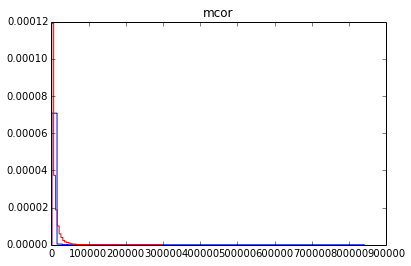

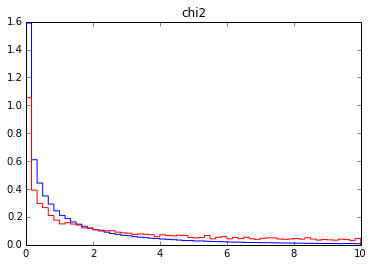

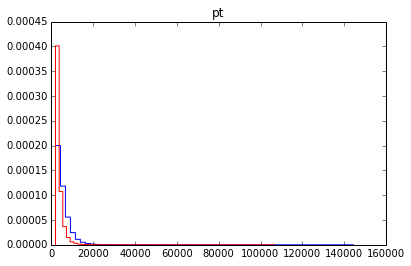

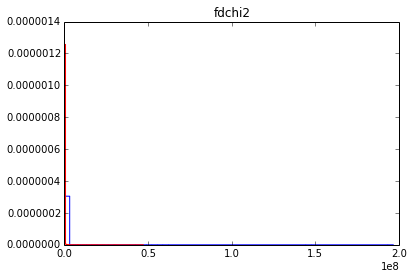

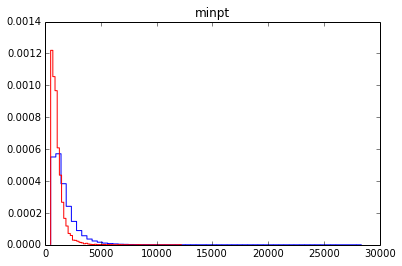

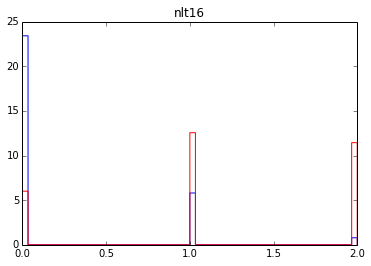

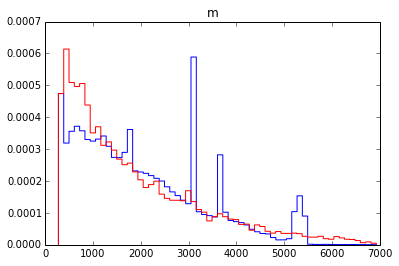

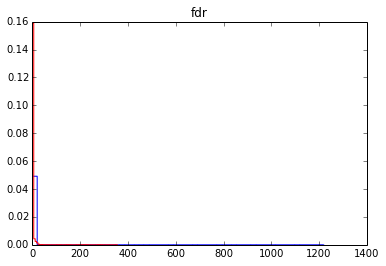

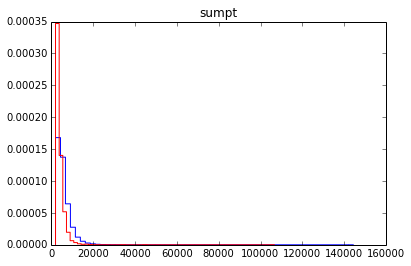

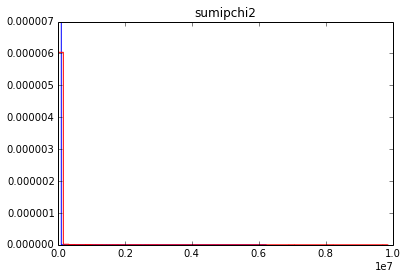

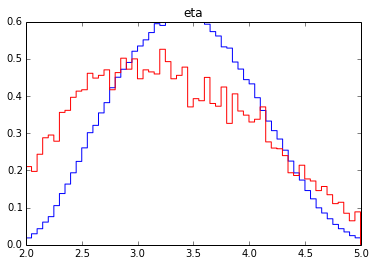

In [26]:
for var in variables_base + variables_additional:
    hist(train[train.signal == 1][var].values, color='b', bins=60, histtype='step', normed=True)
    hist(train[train.signal == 0][var].values, color='r', bins=60, histtype='step', normed=True)
    title(var)
    show()

In [27]:
import cPickle
if os.path.exists('models/hlt1_body2.pkl'):
    with open('models/hlt1_body2.pkl', 'r') as file_mn:
        estimators = cPickle.load(file_mn)
else:
    estimators = {}

-----------

## Matrixnet training

In [28]:
from rep_ef.estimators import MatrixNetSkyGridClassifier
params = {'user_name': 'antares', 'connection': 'skygrid', 'iterations': 5000, 'sync': False}

In [29]:
estimators['MN: mcor cut, mcor var'] = MatrixNetSkyGridClassifier(train_features=variables_base,
                                                                  **params)
estimators['MN: mcor cut, mcor var'].fit(train_cut, train_cut['signal'])

MatrixNetSkyGridClassifier(auto_stop=None, baseline_feature=None,
              command_line_params=None, connection='skygrid',
              dump_filename=None, features_sample_rate_per_iteration=1.0,
              intervals=64, iterations=5000, max_features_per_iteration=6,
              regularization=0.01, sync=False,
              train_features=['mcor', 'chi2', 'pt', 'fdchi2', 'minpt', 'nlt16'],
              training_fraction=0.5, user_name='antares')

In [30]:
estimators['MN: mcor cut, mcor var'].get_feature_importances().sort('effect')

effect  efficiency  information
chi2    0.339326    0.076518     1.000000
minpt   0.391059    0.092294     0.955473
nlt16   0.603334    1.000000     0.136052
pt      0.604027    0.144935     0.939794
fdchi2  0.903089    0.222261     0.916252
mcor    1.000000    0.226159     0.997089

In [31]:
estimators['MN'] = MatrixNetSkyGridClassifier(train_features=variables_mcor, **params)
estimators['MN'].fit(train, train['signal'])

MatrixNetSkyGridClassifier(auto_stop=None, baseline_feature=None,
              command_line_params=None, connection='skygrid',
              dump_filename=None, features_sample_rate_per_iteration=1.0,
              intervals=64, iterations=5000, max_features_per_iteration=6,
              regularization=0.01, sync=False,
              train_features=['chi2', 'pt', 'fdchi2', 'minpt', 'nlt16'],
              training_fraction=0.5, user_name='antares')

In [32]:
estimators['MN'].get_feature_importances().sort('effect')

effect  efficiency  information
chi2    0.365576    0.093468     1.000000
minpt   0.392021    0.105485     0.950177
nlt16   0.548956    1.000000     0.140354
pt      0.638030    0.172715     0.944490
fdchi2  1.000000    0.278631     0.917606

In [33]:
estimators['additional features'] = MatrixNetSkyGridClassifier(train_features=variables_base + variables_additional,
                                                               **params)
estimators['additional features'].fit(train_cut, train_cut['signal'])

MatrixNetSkyGridClassifier(auto_stop=None, baseline_feature=None,
              command_line_params=None, connection='skygrid',
              dump_filename=None, features_sample_rate_per_iteration=1.0,
              intervals=64, iterations=5000, max_features_per_iteration=6,
              regularization=0.01, sync=False,
              train_features=['mcor', 'chi2', 'pt', 'fdchi2', 'minpt', 'nlt16', 'm', 'fdr', 'sumpt', 'sumipchi2', 'eta'],
              training_fraction=0.5, user_name='antares')

In [34]:
estimators['additional features'].get_feature_importances().sort('effect')  

effect  efficiency  information
pt         0.167925    0.034097     0.922125
chi2       0.309702    0.059098     0.981199
sumipchi2  0.324938    0.067649     0.899348
minpt      0.372663    0.074427     0.937510
eta        0.374115    0.070048     1.000000
fdr        0.413342    0.085815     0.901855
m          0.485190    0.092501     0.982099
sumpt      0.617058    0.125400     0.921341
fdchi2     0.666396    0.138787     0.899026
nlt16      0.712973    1.000000     0.133494
mcor       1.000000    0.191381     0.978344

In [35]:
estimators['MN: pt->sumpt'] = MatrixNetSkyGridClassifier(train_features=variables_new, **params)
estimators['MN: pt->sumpt'].fit(train, train['signal'])

MatrixNetSkyGridClassifier(auto_stop=None, baseline_feature=None,
              command_line_params=None, connection='skygrid',
              dump_filename=None, features_sample_rate_per_iteration=1.0,
              intervals=64, iterations=5000, max_features_per_iteration=6,
              regularization=0.01, sync=False,
              train_features=['chi2', 'minpt', 'sumpt', 'fdchi2', 'nlt16'],
              training_fraction=0.5, user_name='antares')

In [36]:
estimators['MN: pt->sumpt'].get_feature_importances().sort('effect')  

effect  efficiency  information
minpt   0.366330    0.092172     0.950177
chi2    0.379067    0.090625     1.000000
nlt16   0.587074    1.000000     0.140354
sumpt   0.625999    0.158852     0.942135
fdchi2  1.000000    0.260540     0.917606

In [37]:
estimators['MN: pt->sumpt, remove minpt'] = MatrixNetSkyGridClassifier(train_features=variables_new_minpt, **params)
estimators['MN: pt->sumpt, remove minpt'].fit(train, train['signal'])

MatrixNetSkyGridClassifier(auto_stop=None, baseline_feature=None,
              command_line_params=None, connection='skygrid',
              dump_filename=None, features_sample_rate_per_iteration=1.0,
              intervals=64, iterations=5000, max_features_per_iteration=6,
              regularization=0.01, sync=False,
              train_features=['chi2', 'sumpt', 'fdchi2', 'nlt16'],
              training_fraction=0.5, user_name='antares')

In [38]:
estimators['MN: pt->sumpt, remove minpt'].get_feature_importances().sort('effect')  

effect  efficiency  information
chi2    0.362977    0.089028     1.000000
nlt16   0.572238    1.000000     0.140354
sumpt   0.671274    0.174757     0.942135
fdchi2  1.000000    0.267295     0.917606

In [39]:
borders = {
'chi2': [1,2.5,5,7.5,10,100], 
'sumpt': [3000,4000,5000,6000,7500,9000,12e3,23e3,50e3],  
'fdchi2': [33,125,350,780,1800,5000,10000], 
'minpt': [350,500,750,1500,3000,5000], 
'nlt16': [0.5]
}

In [40]:
borders_minpt = {
'chi2': [1,2.5,5,7.5,10,100],  
'sumpt': [3000,4000,5000,6000,7500,9000,12e3,23e3,50e3],  
'fdchi2': [33,125,350,780,1800,5000,10000],  
'nlt16': [0.5]
}

In [41]:
estimators['MN BBDT: pt->sumpt'] = MatrixNetSkyGridClassifier(train_features=variables_new, 
                                                              intervals=borders, **params)
estimators['MN BBDT: pt->sumpt'].fit(train, train['signal'])

MatrixNetSkyGridClassifier(auto_stop=None, baseline_feature=None,
              command_line_params=None, connection='skygrid',
              dump_filename=None, features_sample_rate_per_iteration=1.0,
              intervals={'chi2': [1, 2.5, 5, 7.5, 10, 100], 'sumpt': [3000, 4000, 5000, 6000, 7500, 9000, 12000.0, 23000.0, 50000.0], 'nlt16': [0.5], 'fdchi2': [33, 125, 350, 780, 1800, 5000, 10000], 'minpt': [350, 500, 750, 1500, 3000, 5000]},
              iterations=5000, max_features_per_iteration=6,
              regularization=0.01, sync=False,
              train_features=['chi2', 'minpt', 'sumpt', 'fdchi2', 'nlt16'],
              training_fraction=0.5, user_name='antares')

In [42]:
estimators['MN BBDT: pt->sumpt'].get_feature_importances().sort('effect')  

effect  efficiency  information
minpt   0.244233    0.126134     0.633747
chi2    0.319610    0.182390     0.573541
sumpt   0.616134    0.201660     1.000000
nlt16   0.818974    1.000000     0.268050
fdchi2  1.000000    0.330490     0.990346

In [ ]:
estimators['MN BBDT: pt->sumpt, remove minpt'] = MatrixNetSkyGridClassifier(train_features=variables_new_minpt, 
                                                                            intervals=borders_minpt, **params)
estimators['MN BBDT: pt->sumpt, remove minpt'].fit(train, train['signal'])

MatrixNetSkyGridClassifier(auto_stop=None, baseline_feature=None,
              command_line_params=None, connection='skygrid',
              dump_filename=None, features_sample_rate_per_iteration=1.0,
              intervals={'chi2': [1, 2.5, 5, 7.5, 10, 100], 'sumpt': [3000, 4000, 5000, 6000, 7500, 9000, 12000.0, 23000.0, 50000.0], 'nlt16': [0.5], 'fdchi2': [33, 125, 350, 780, 1800, 5000, 10000]},
              iterations=5000, max_features_per_iteration=6,
              regularization=0.01, sync=False,
              train_features=['chi2', 'sumpt', 'fdchi2', 'nlt16'],
              training_fraction=0.5, user_name='antares')

In [ ]:
estimators['MN BBDT: pt->sumpt, remove minpt'].get_feature_importances().sort('effect')  

## Hierarhical training

### without minpt

In [ ]:
from rep.metaml import FoldingClassifier
from rep.estimators import SklearnClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_base_partial = SklearnClassifier(RandomForestClassifier(n_estimators=300, min_samples_leaf=500, max_depth=7,
                                                               max_features=4))
forest_folding_top = FoldingClassifier(base_estimator=forest_base_partial, random_state=11, 
                                       features=variables_new_minpt, ipc_profile=PROFILE)
forest_folding_top.fit(train, train['signal'])

In [ ]:
for rank in range(1, 3):
    good_events = get_best_svr(train, forest_folding_top, rank)
    ef_good = MatrixNetSkyGridClassifier(train_features=variables_base, **params)
    ef_good.fit(good_events, good_events['signal'])
    estimators['top-{} forest preselection, use mcor'.format(rank)] = ef_good 

In [ ]:
for rank in range(1, 3):
    good_events = get_best_svr(train, forest_folding_top, rank)
    ef_good = MatrixNetSkyGridClassifier(train_features=variables_new_minpt, **params)
    ef_good.fit(good_events, good_events['signal'])
    estimators['top-{} forest preselection'.format(rank)] = ef_good 

### with minpt

In [ ]:
forest_base_partial = SklearnClassifier(RandomForestClassifier(n_estimators=300, min_samples_leaf=500, max_depth=7,
                                                               max_features=5))
forest_folding_top_minpt = FoldingClassifier(base_estimator=forest_base_partial, random_state=11, 
                                             features=variables_new, ipc_profile=PROFILE)
forest_folding_top_minpt.fit(train, train['signal'])

In [ ]:
for rank in range(1, 3):
    good_events = get_best_svr(train, forest_folding_top_minpt, rank)
    ef_good = MatrixNetSkyGridClassifier(train_features=variables_new, **params)
    ef_good.fit(good_events, good_events['signal'])
    estimators['top-{} forest preselection, minpt'.format(rank)] = ef_good 

In [ ]:
estimators['top-1 forest preselection, minpt'].get_feature_importances()

In [ ]:
for rank in range(1, 3):
    good_events = get_best_svr(train, forest_folding_top_minpt, rank)
    ef_good = MatrixNetSkyGridClassifier(train_features=variables_base, **params)
    ef_good.fit(good_events, good_events['signal'])
    estimators['top-{} forest preselection, minpt, base'.format(rank)] = ef_good 

In [ ]:
estimators['top-1 forest preselection, minpt, base'].get_feature_importances()

# forest uses mcor 

In [ ]:
forest_base_partial = SklearnClassifier(RandomForestClassifier(n_estimators=300, min_samples_leaf=500, max_depth=7,
                                                               max_features=5))
forest_folding_top_mcor = FoldingClassifier(base_estimator=forest_base_partial, random_state=11, 
                                             features=variables_base, ipc_profile=PROFILE)
forest_folding_top_mcor.fit(train, train['signal'])

In [ ]:
for rank in range(1, 3):
    good_events = get_best_svr(train, forest_folding_top_mcor, rank)
    ef_good = MatrixNetSkyGridClassifier(train_features=variables_new, **params)
    ef_good.fit(good_events, good_events['signal'])
    estimators['top-{} forest preselection, minpt; mcor for forest'.format(rank)] = ef_good 

In [ ]:
for rank in range(1, 3):
    good_events = get_best_svr(train, forest_folding_top_mcor, rank)
    ef_good = MatrixNetSkyGridClassifier(train_features=variables_base, **params)
    ef_good.fit(good_events, good_events['signal'])
    estimators['top-{} forest preselection, mcor'.format(rank)] = ef_good 

## Save estimators

In [ ]:
import cPickle
with open('models/hlt1_body2.pkl', 'w') as file_mn:
    cPickle.dump(estimators, file_mn)

----

In [84]:
estimators.keys()

['MN BBDT: pt->sumpt, remove minpt',
 'top-1 forest preselection, minpt; mcor for forest',
 'top-1 forest preselection, minpt',
 'top-1 forest preselection, minpt, base',
 'MN: pt->sumpt',
 'top-2 forest preselection, minpt; mcor for forest',
 'top-1 forest preselection, mcor',
 'MN',
 'MN: pt->sumpt, remove minpt',
 'top-2 forest preselection, use mcor',
 'MN: mcor cut, mcor var',
 'top-1 forest preselection, use mcor',
 'top-2 forest preselection, mcor',
 'top-2 forest preselection, minpt',
 'MN BBDT: pt->sumpt',
 'top-2 forest preselection',
 'top-2 forest preselection, minpt, base',
 'additional features',
 'top-1 forest preselection']

## Calculate thresholds on classifiers

In [85]:
thresholds = dict()
RATE = [50000.]
events_pass = dict()

for name, cl in estimators.items():
    prob = cl.predict_proba(ds_test_bck)
    if 'mcor cut' not in name and 'additional' not in name:
        thr, result = calculate_thresholds(ds_test_bck, prob, total_test_bck_events, rates=RATE)
        for rate, val in result.items():
            events_pass['{}-{}'.format(rate, name)] = val[1]
    else:
        thr, result = calculate_thresholds(ds_test_bck[ds_test_bck['mcor'] <= 10e3], 
                                           prob[numpy.array(ds_test_bck['mcor']) <= 10e3], 
                                           total_test_bck_events, rates=RATE)
        for rate, val in result.items():
            events_pass['{}-{}'.format(rate, name)] = val[1]

    thresholds[name] = thr
    print name, result

MN BBDT: pt->sumpt, remove minpt {50000.0: (0.93403029768833201, 2781, 0.04997035200258746)}
top-1 forest preselection, minpt; mcor for forest {50000.0: (0.70604886068224815, 2782, 0.049988320485867786)}
top-1 forest preselection, minpt {50000.0: (0.69359113928519023, 2782, 0.049988320485867786)}
top-1 forest preselection, minpt, base {50000.0: (0.62951633490321157, 2782, 0.049988320485867786)}
MN: pt->sumpt {50000.0: (0.92164056154030227, 2782, 0.049988320485867786)}
top-2 forest preselection, minpt; mcor for forest {50000.0: (0.82231195363056697, 2782, 0.049988320485867786)}
top-1 forest preselection, mcor {50000.0: (0.62445308648961362, 2782, 0.049988320485867786)}
MN {50000.0: (0.92181915444909279, 2782, 0.049988320485867786)}
MN: pt->sumpt, remove minpt {50000.0: (0.92402185981425233, 2782, 0.049988320485867786)}
top-2 forest preselection, use mcor {50000.0: (0.76853290368617566, 2782, 0.049988320485867786)}
MN: mcor cut, mcor var {50000.0: (0.88272822063177037, 2782, 0.0499883204

## Final efficiencies for each mode

In [86]:
est_cut = dict([('MN: mcor cut, mcor var', estimators['MN: mcor cut, mcor var']),
                ('additional features', estimators['additional features'])])
train_modes_eff, statistic = result_statistic(est_cut, sig_train_modes_names, 
                                              ds_test_signal[ds_test_signal['mcor'] <= 10e3],
                                              thresholds, RATE, total_test_signal_events)

In [87]:
est = []
for key in ['MN', 'MN: pt->sumpt', 'MN: pt->sumpt, remove minpt']:
    est.append((key, estimators[key]))
est = dict(est)

train_modes_eff_rest, statistic_rest = result_statistic(est, sig_train_modes_names, 
                                                        ds_test_signal,
                                                        thresholds, RATE, total_test_signal_events)

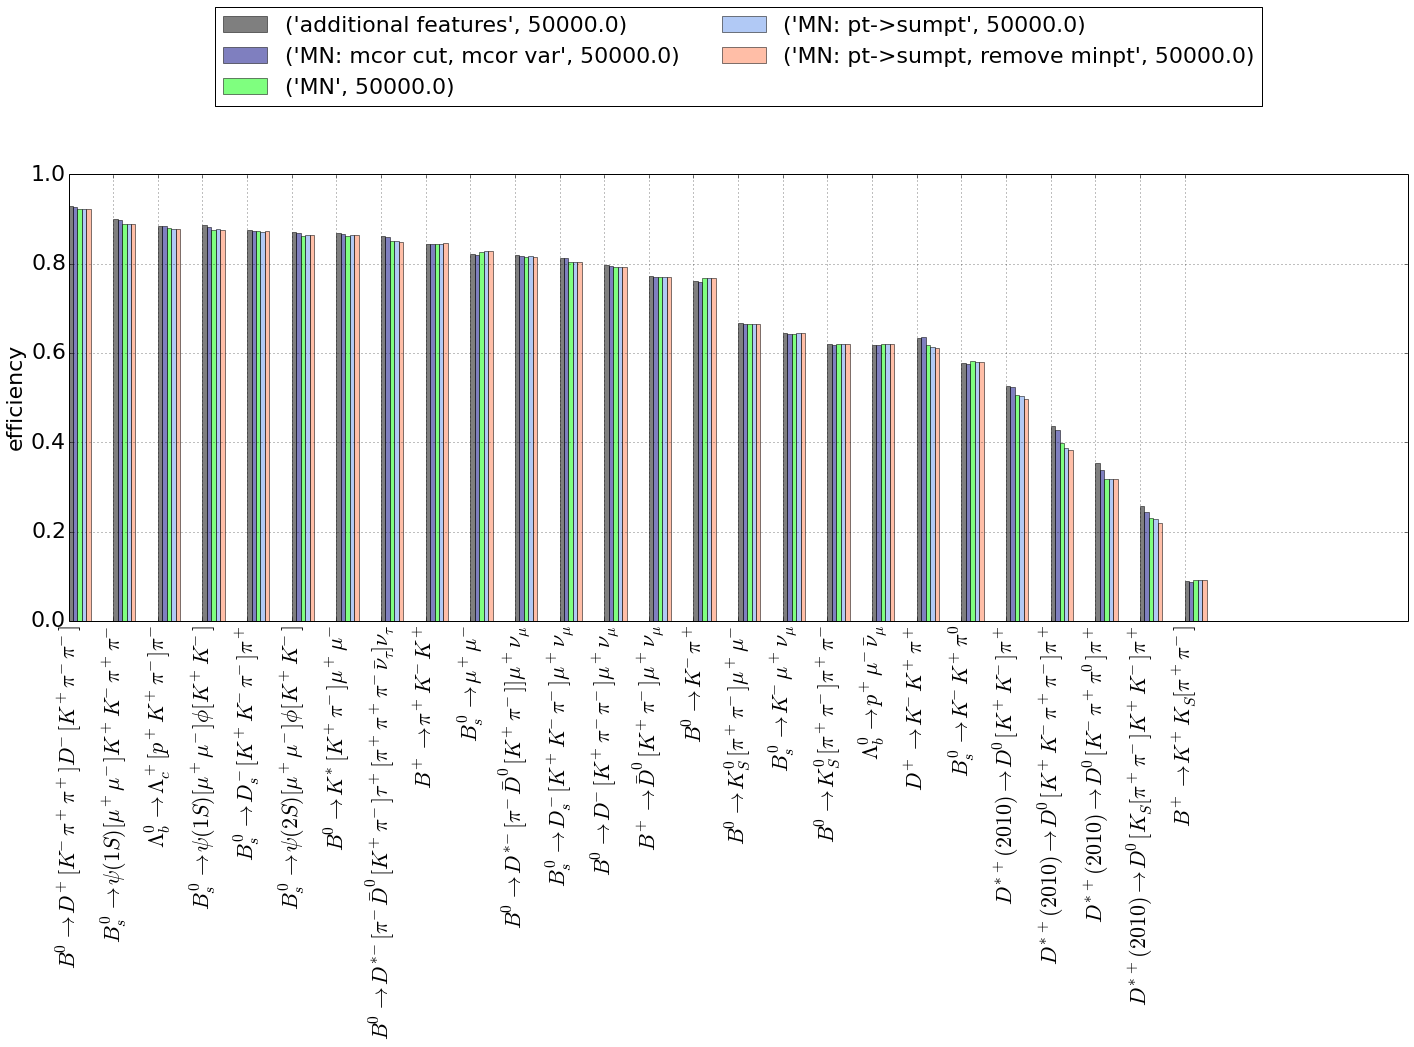

In [88]:
from rep.plotting import BarComparePlot
BarComparePlot(OrderedDict(train_modes_eff.items() + train_modes_eff_rest.items()), 
               sortby=('MN', 50000.0)).plot(new_plot=True, figsize=(24, 8), ylabel='efficiency', fontsize=22)

lgd = legend(bbox_to_anchor=(0.5, 1.4), loc='upper center', ncol=2, fontsize=22)
# plt.savefig('hlt1.pdf' , format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

# Comparison of standard method and forest preselection

In [89]:
compare_hierarhical = OrderedDict()
hierarhical = ['top-1 forest preselection',
               'top-2 forest preselection',
               'top-1 forest preselection, use mcor',
               'top-2 forest preselection, use mcor',


               'top-2 forest preselection, minpt',
               'top-1 forest preselection, minpt',
               'top-2 forest preselection, minpt, base',
               'top-1 forest preselection, minpt, base',
               
               'top-1 forest preselection, minpt; mcor for forest',
               'top-2 forest preselection, minpt; mcor for forest',
               'top-1 forest preselection, mcor',
               'top-2 forest preselection, mcor',
               
               'MN: pt->sumpt',
               'MN BBDT: pt->sumpt', 
               'MN: pt->sumpt, remove minpt',
               'MN BBDT: pt->sumpt, remove minpt'
                ]
for key in hierarhical:
    compare_hierarhical[key] = estimators[key]


train_modes_eff_forest, statistic_forest = result_statistic(compare_hierarhical, sig_train_modes_names, 
                                                            ds_test_signal,
                                                            thresholds, RATE, total_test_signal_events)

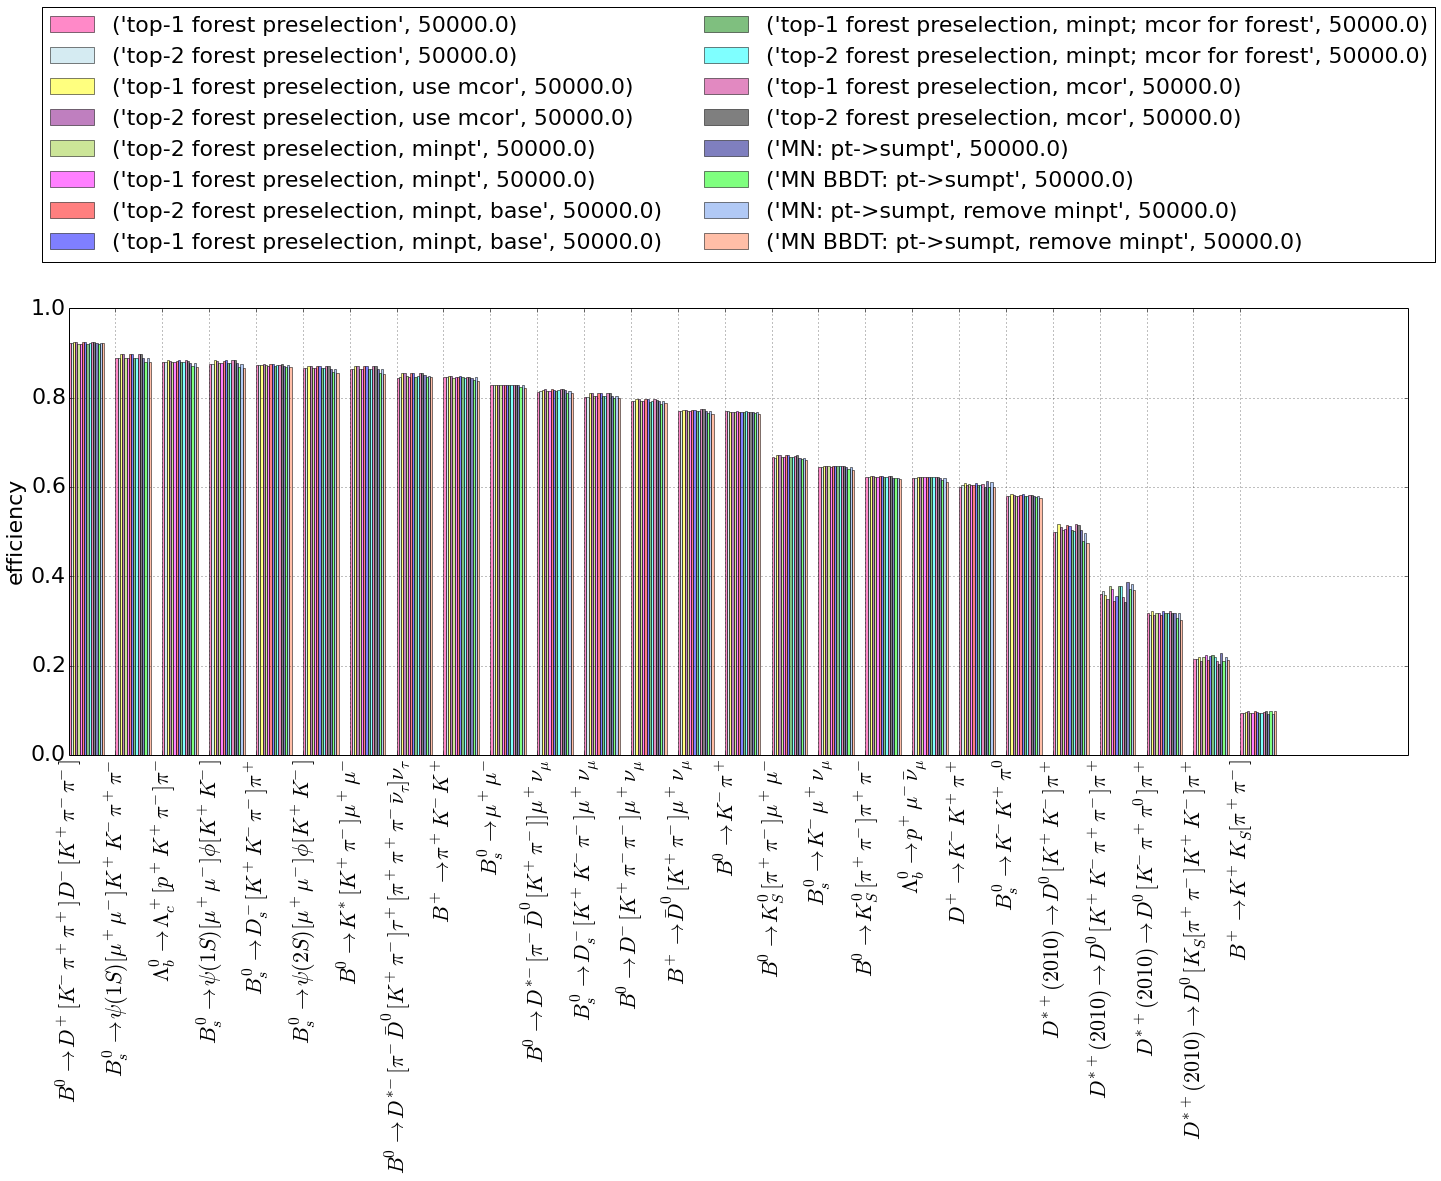

In [90]:
BarComparePlot(OrderedDict([((key, 50000.), train_modes_eff_forest[(key, 50000.)]) for key in hierarhical]),
               sortby=('MN BBDT: pt->sumpt', 50000.0)).plot(new_plot=True, figsize=(24, 8), 
                                                            ylabel='efficiency', fontsize=22)
lgd = legend(bbox_to_anchor=(0.5, 1.7), loc='upper center', ncol=2, fontsize=22)

In [91]:
pandas.DataFrame(statistic)

50000.0              classifier      mode  \
0   88.580179     additional features  13144001   
1   35.416667     additional features  27163400   
2   86.110714     additional features  11536011   
3   92.829343     additional features  11296013   
4   86.953969     additional features  11114001   
5   87.452168     additional features  13264021   
6   63.327370     additional features  21263002   
7   77.249895     additional features  12873002   
8   90.046757     additional features  13246001   
9   81.376582     additional features  13774002   
10  76.051925     additional features  11102003   
11  82.209155     additional features  13112001   
12  64.442603     additional features  13512010   
13  61.794983     additional features  15512011   
14  57.724393     additional features  13102412   
15  25.659691     additional features  27265101   
16   8.943383     additional features  12103121   
17  87.179487     additional features  13144020   
18  52.680653     additional features  27163002   
19  88.460456     additional features  15164001   
20  43.584071     additional features  27265001   
21  81.857819     additional features  11874004   
22  66.620924     additional features  11114101   
23  62.097583     additional features  11104121   
24  79.610195     additional features  11874042   
25  84.465021     additional features  12103035   
26  88.155856  MN: mcor cut, mcor var  13144001   
27  33.854167  MN: mcor cut, mcor var  27163400   
28  85.910456  MN: mcor cut, mcor var  11536011   
29  92.605260  MN: mcor cut, mcor var  11296013   
30  86.686458  MN: mcor cut, mcor var  11114001   
31  87.396365  MN: mcor cut, mcor var  13264021   
32  63.550984  MN: mcor cut, mcor var  21263002   
33  76.956886  MN: mcor cut, mcor var  12873002   
34  89.772666  MN: mcor cut, mcor var  13246001   
35  81.186709  MN: mcor cut, mcor var  13774002   
36  75.881826  MN: mcor cut, mcor var  11102003   
37  82.013144  MN: mcor cut, mcor var  13112001   
38  64.350509  MN: mcor cut, mcor var  13512010   
39  61.700739  MN: mcor cut, mcor var  15512011   
40  57.624036  MN: mcor cut, mcor var  13102412   
41  24.385805  MN: mcor cut, mcor var  27265101   
42   8.600793  MN: mcor cut, mcor var  12103121   
43  86.884412  MN: mcor cut, mcor var  13144020   
44  52.447552  MN: mcor cut, mcor var  27163002   
45  88.404165  MN: mcor cut, mcor var  15164001   
46  42.699115  MN: mcor cut, mcor var  27265001   
47  81.695241  MN: mcor cut, mcor var  11874004   
48  66.379405  MN: mcor cut, mcor var  11114101   
49  61.869585  MN: mcor cut, mcor var  11104121   
50  79.460270  MN: mcor cut, mcor var  11874042   
51  84.370054  MN: mcor cut, mcor var  12103035   

                                                                                                                    name  
0                                                       $B_{s}^{0} \rightarrow \psi(1S)[\mu^{+}\mu^{-}]\phi[K^{+}K^{-}]$  
1                                                           $D^{*+}(2010) \rightarrow D^{0}[K^{-}\pi^{+}\pi^{0}]\pi^{+}$  
2   $B^{0} \rightarrow D^{*-}[\pi^{-}\bar{D}^{0}[K^{+}\pi^{-}]\tau^{+}[\pi^{+}\pi^{+}\pi^{-}\bar{\nu}_{\tau}]\nu_{\tau}$  
3                                               $B^{0} \rightarrow D^{+}[K^{-}\pi^{+}\pi^{+}]D^{-}[K^{+}\pi^{-}\pi^{-}]$  
4                                                                  $B^{0} \rightarrow K^{*}[K^{+}\pi^{-}]\mu^{+}\mu^{-}$  
5                                                            $B_{s}^{0} \rightarrow D_{s}^{-}[K^{+}K^{-}\pi^{-}]\pi^{+}$  
6                                                                                  $D^{+} \rightarrow K^{-}K^{+}\pi^{+}$  
7                                                          $B^{+} \rightarrow \bar{D}^{0}[K^{+}\pi^{-}]\mu^{+}\nu_{\mu}$  
8                                               $B_{s}^{0} \rightarrow \psi(1S)[\mu^{+}\mu^{-}]K^{+}K^{-}\pi^{+}\pi^{-}$  
9                                                   $B_{s}^{0} \rightarr

In [92]:
pandas.DataFrame(statistic_rest)

50000.0                   classifier      mode  \
0   87.528596                           MN  13144001   
1   31.770833                           MN  27163400   
2   85.037906                           MN  11536011   
3   92.251445                           MN  11296013   
4   86.190585                           MN  11114001   
5   87.244898                           MN  13264021   
6   61.694991                           MN  21263002   
7   77.040603                           MN  12873002   
8   88.789165                           MN  13246001   
9   80.411392                           MN  13774002   
10  76.741271                           MN  11102003   
11  82.589646                           MN  13112001   
12  64.355114                           MN  13512010   
13  61.932724                           MN  15512011   
14  58.094462                           MN  13102412   
15  22.929936                           MN  27265101   
16   9.123693                           MN  12103121   
17  86.284086                           MN  13144020   
18  50.582751                           MN  27163002   
19  87.981987                           MN  15164001   
20  39.823009                           MN  27265001   
21  81.510494                           MN  11874004   
22  66.412339                           MN  11114101   
23  62.088463                           MN  11104121   
24  79.260370                           MN  11874042   
25  84.338398                           MN  12103035   
26  87.524906  MN: pt->sumpt, remove minpt  13144001   
27  31.770833  MN: pt->sumpt, remove minpt  27163400   
28  84.923473  MN: pt->sumpt, remove minpt  11536011   
29  92.275032  MN: pt->sumpt, remove minpt  11296013   
..        ...                          ...       ...   
48  66.467230  MN: pt->sumpt, remove minpt  11114101   
49  62.061104  MN: pt->sumpt, remove minpt  11104121   
50  79.260370  MN: pt->sumpt, remove minpt  11874042   
51  84.544160  MN: pt->sumpt, remove minpt  12103035   
52  87.679876                MN: pt->sumpt  13144001   
53  31.770833                MN: pt->sumpt  27163400   
54  84.994994                MN: pt->sumpt  11536011   
55  92.345795                MN: pt->sumpt  11296013   
56  86.396111                MN: pt->sumpt  11114001   
57  87.149235                MN: pt->sumpt  13264021   
58  61.314848                MN: pt->sumpt  21263002   
59  77.103391                MN: pt->sumpt  12873002   
60  88.837534                MN: pt->sumpt  13246001   
61  80.474684                MN: pt->sumpt  13774002   
62  76.839749                MN: pt->sumpt  11102003   
63  82.860602                MN: pt->sumpt  13112001   
64  64.511673                MN: pt->sumpt  13512010   
65  62.106713                MN: pt->sumpt  15512011   
66  58.012921                MN: pt->sumpt  13102412   
67  22.838944                MN: pt->sumpt  27265101   
68   9.087631                MN: pt->sumpt  12103121   
69  86.523199                MN: pt->sumpt  13144020   
70  50.349650                MN: pt->sumpt  27163002   
71  87.869406                MN: pt->sumpt  15164001   
72  38.716814                MN: pt->sumpt  27265001   
73  81.628732                MN: pt->sumpt  11874004   
74  66.533099                MN: pt->sumpt  11114101   
75  62.088463                MN: pt->sumpt  11104121   
76  79.310345                MN: pt->sumpt  11874042   
77  84.496676                MN: pt->sumpt  12103035   

                                                                                                                    name  
0                                                       $B_{s}^{0} \rightarrow \psi(1S)[\mu^{+}\mu^{-}]\phi[K^{+}K^{-}]$  
1                                                           $D^{*+}(2010) \rightarrow D^{0}[K^{-}\pi^{+}\pi^{0}]\pi^{+}$  
2   $B^{0} \rightarrow D^{*-}[\pi^{-}\bar{D}^{0}[K^{+}\pi^{-}]\tau^{+}[\pi^{+}\pi^{+}\pi^{-}\bar{\nu}_{\tau}]\nu_{\tau}$  
3                                        

## Classification report using svrs 

In [93]:
from rep.data import LabeledDataStorage
from rep.report import ClassificationReport
lds = LabeledDataStorage(test, test['signal'])
report = ClassificationReport(OrderedDict(est.items() + compare_hierarhical.items()), lds)

### roc curve

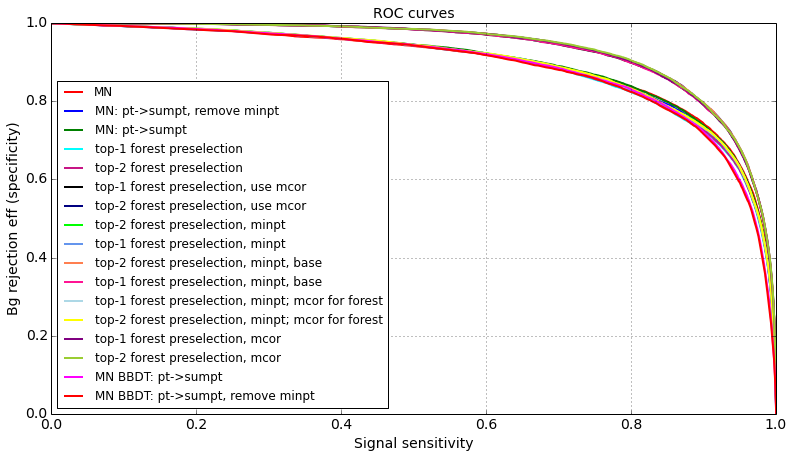

In [94]:
report.roc().plot(new_plot=True)

### efficiencies for each mode per iterations

#### Generate eff metrics

In [95]:
mode_metrics = dict()
for mode in sig_train_modes_names:
    mode_metrics[mode] = dict()
    for rate in [50000.]:
        mode_metrics[mode][rate] = generate_topo_metric(ds_test_bck, ds_test_signal[ds_test_signal['mode'] == mode], 
                                                        total_test_bck_events, total_test_signal_events[mode], rate)

In [96]:
def generate_select_mode(mode):
    def select_mode(pd):
        result = numpy.zeros(len(pd), dtype=bool)
        result[numpy.array(pd['mode']) == mode] = True
        result[numpy.array(pd['signal']) == 0] = True
        return result
    return select_mode

In [97]:
staged_eff_plots = []
for mode in sig_train_modes_names:
    eff_metrics = OrderedDict()
    select_mode = generate_select_mode(mode)
    if len(ds_test_signal[ds_test_signal['mode'] == mode]) <= 0:
        continue
    staged_eff_plots.append(report.learning_curve(mode_metrics[mode][50000.], mask=select_mode, steps=10,
                                                  metric_label='mode {}, rate {}, eff'.format(mode, 50000.)))

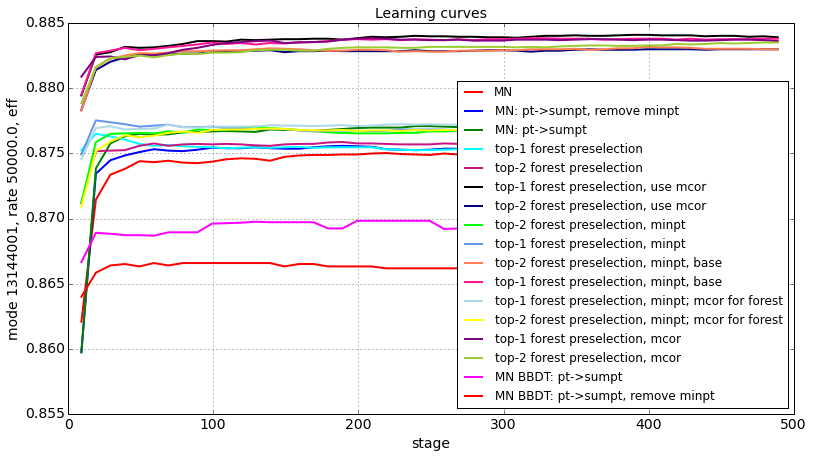

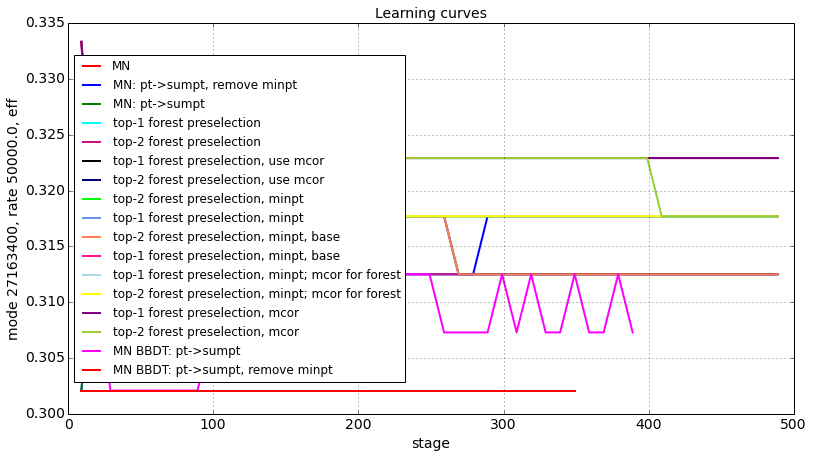

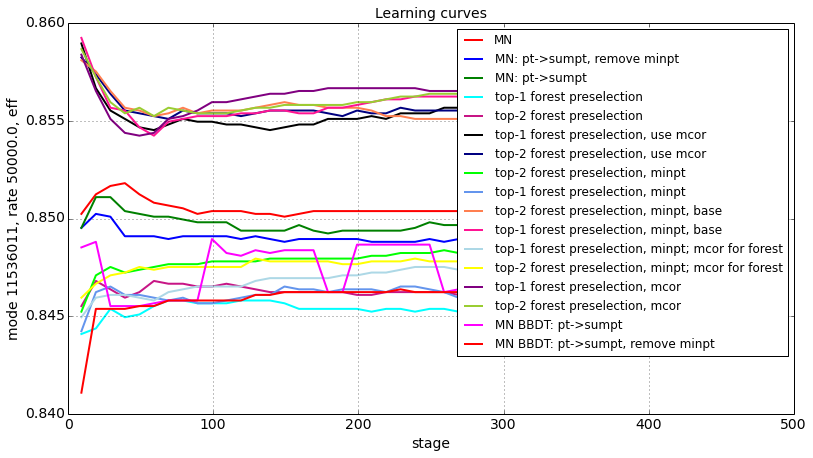

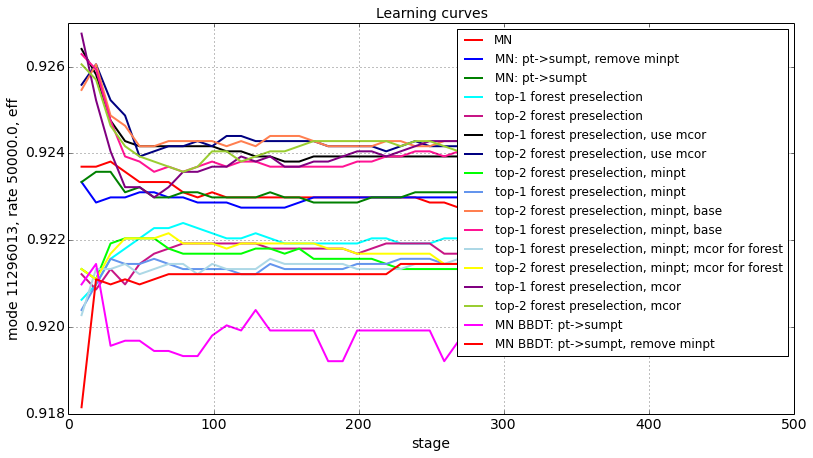

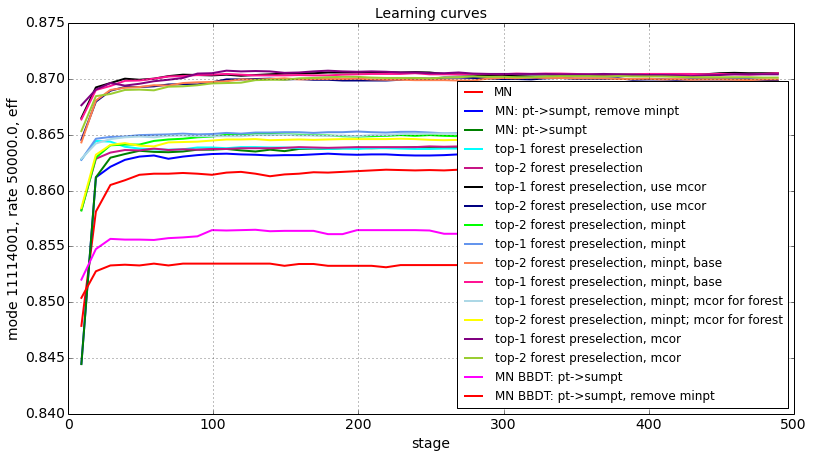

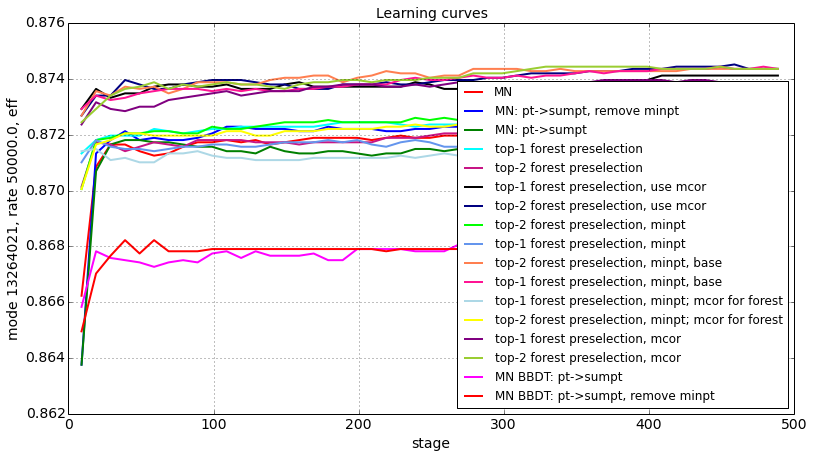

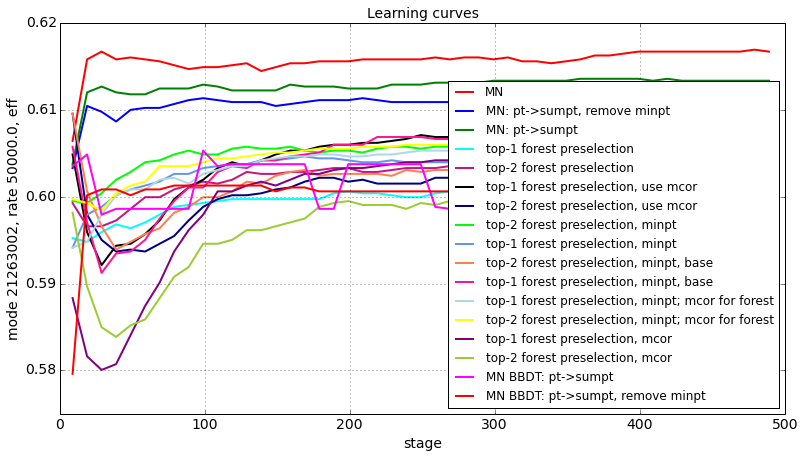

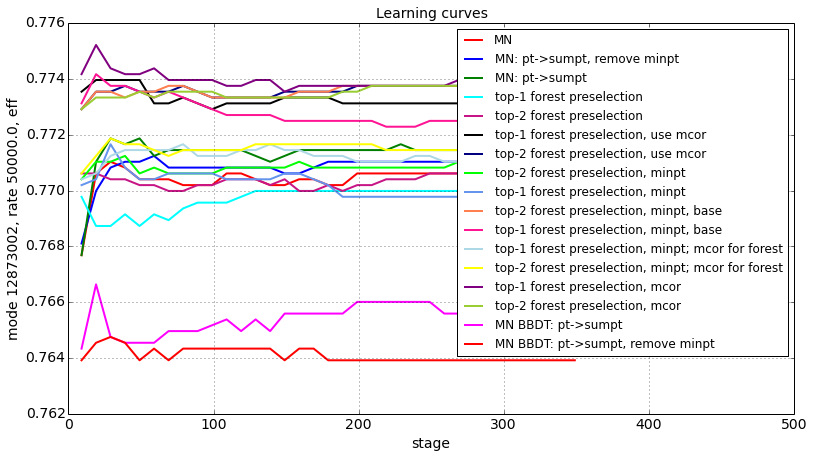

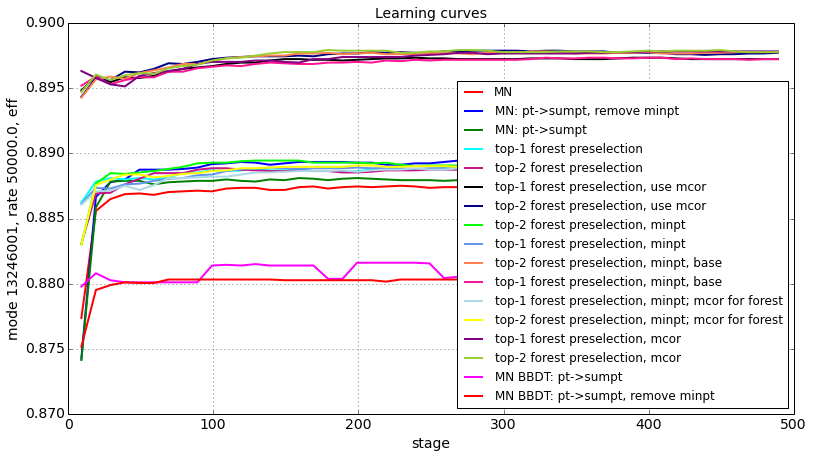

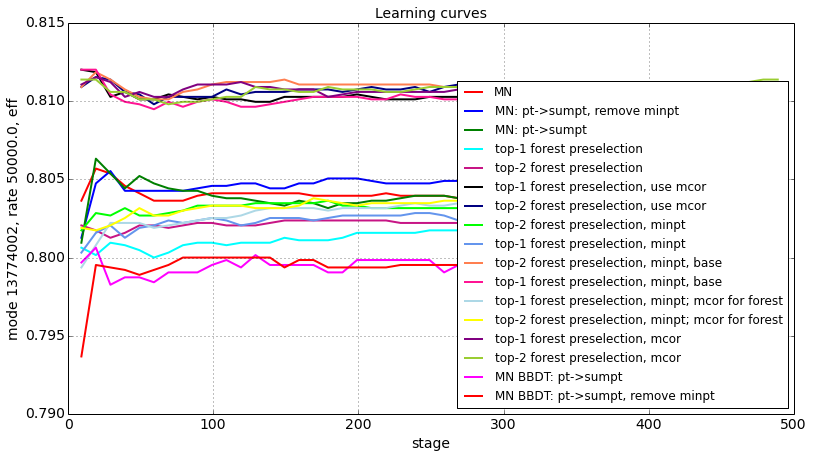

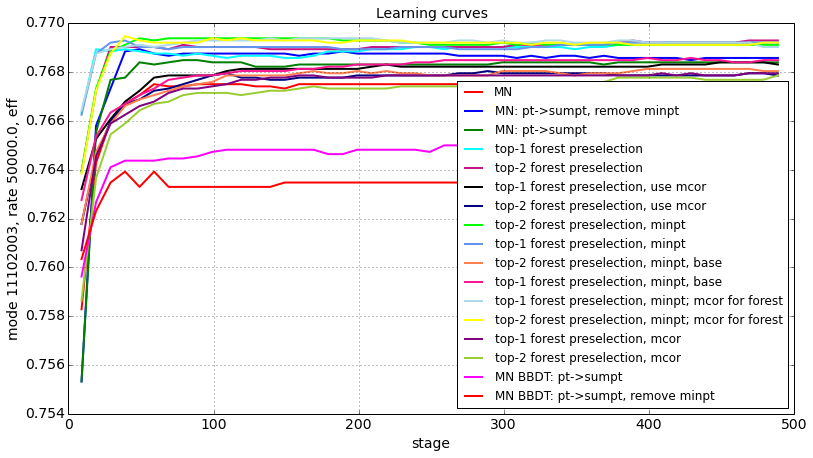

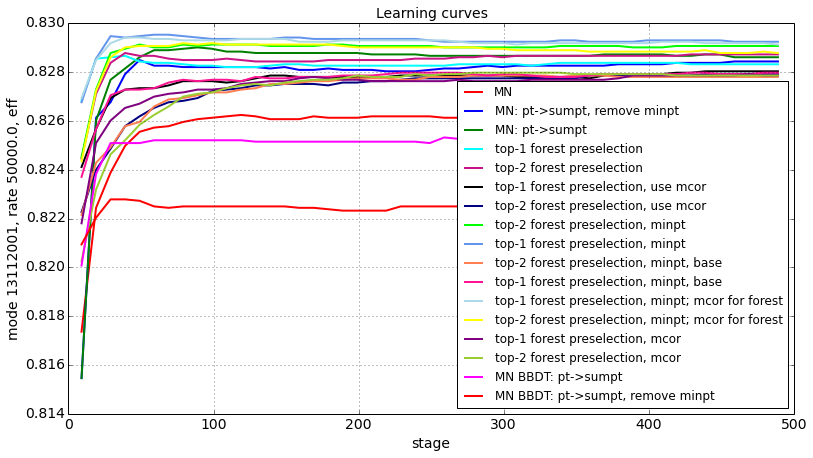

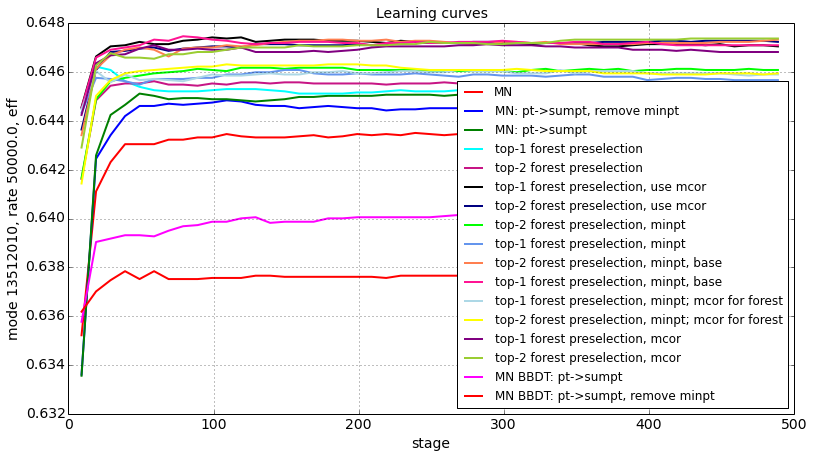

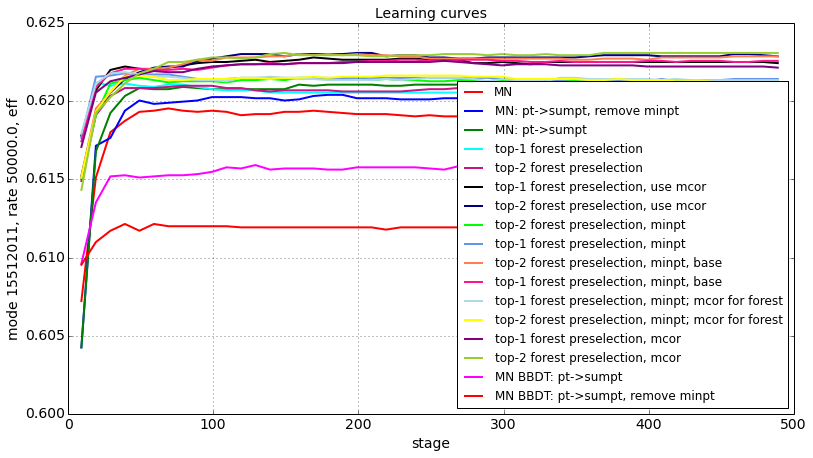

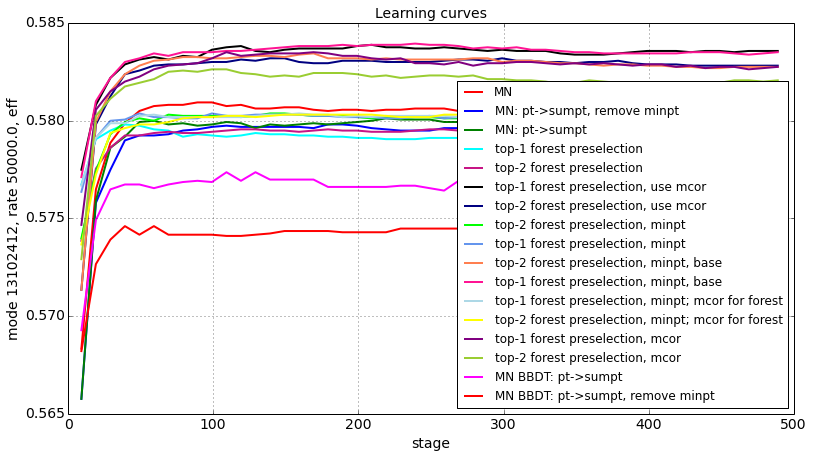

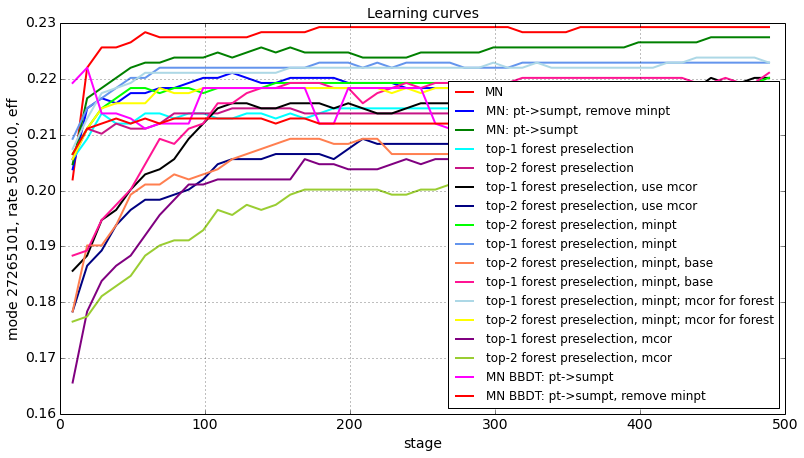

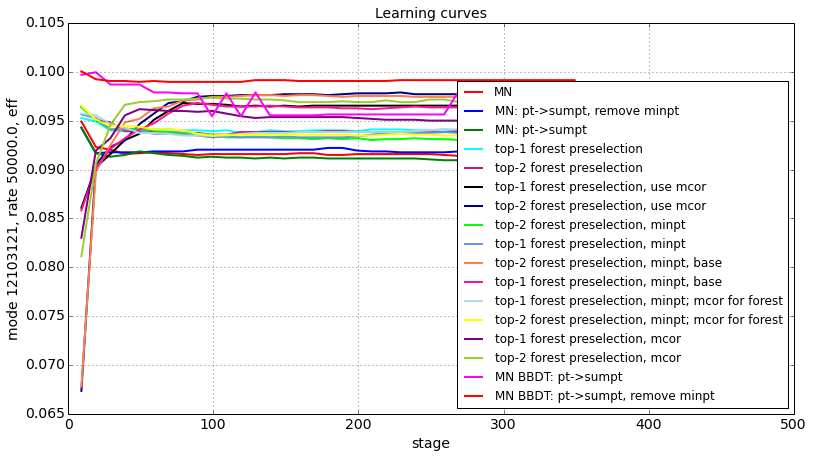

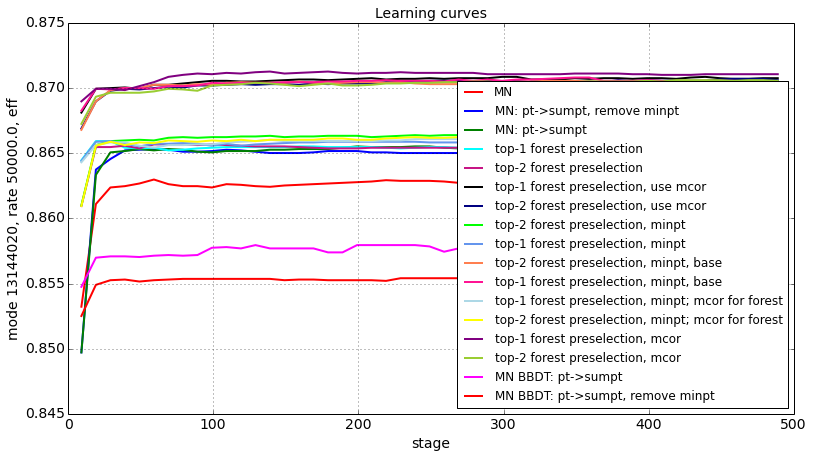

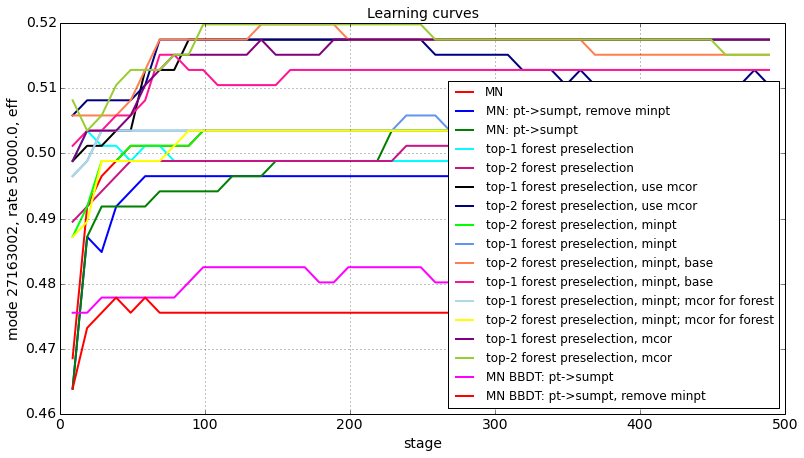

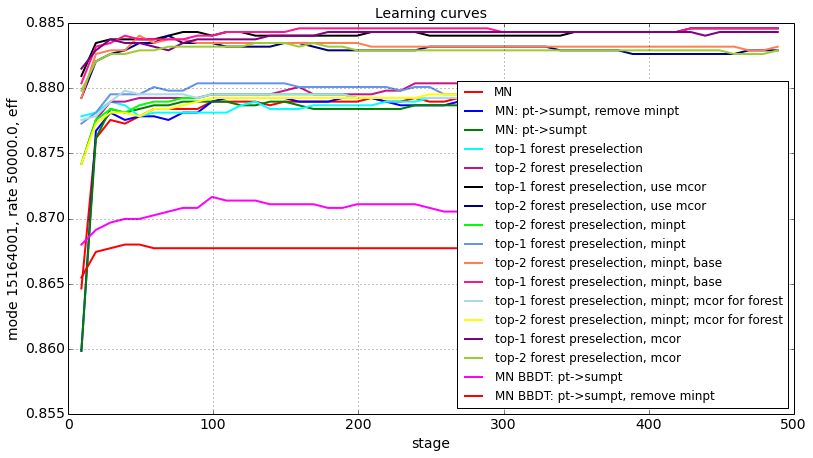

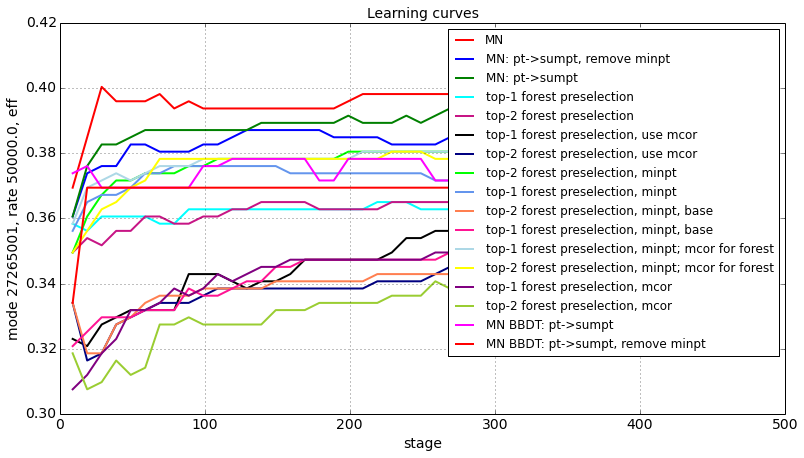

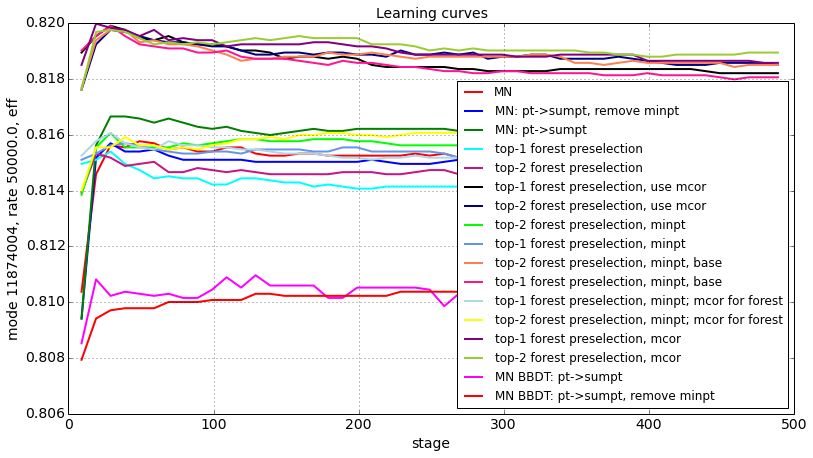

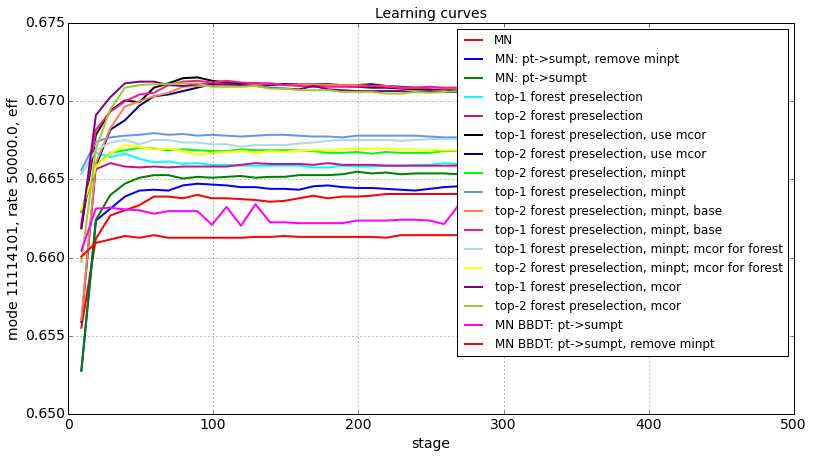

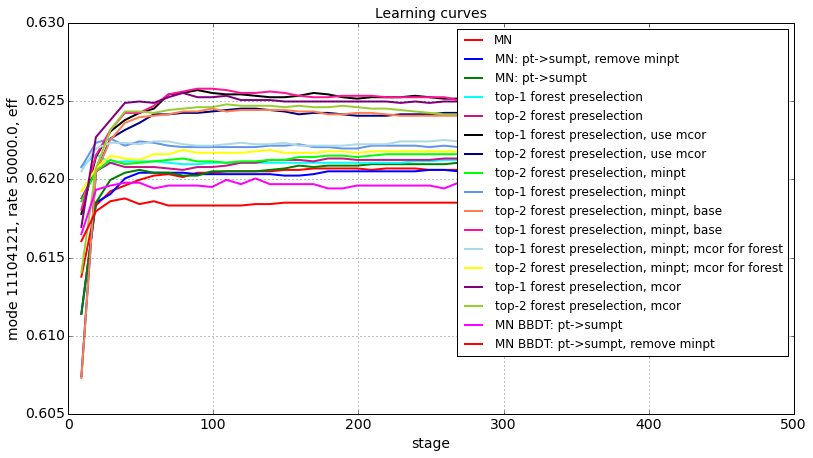

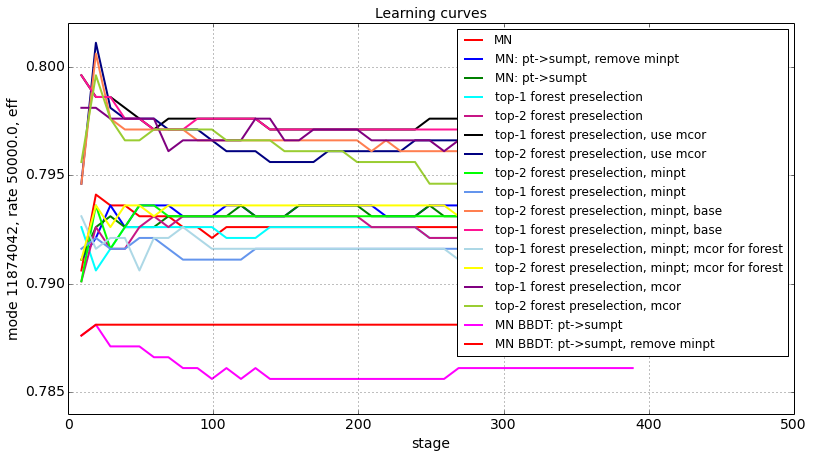

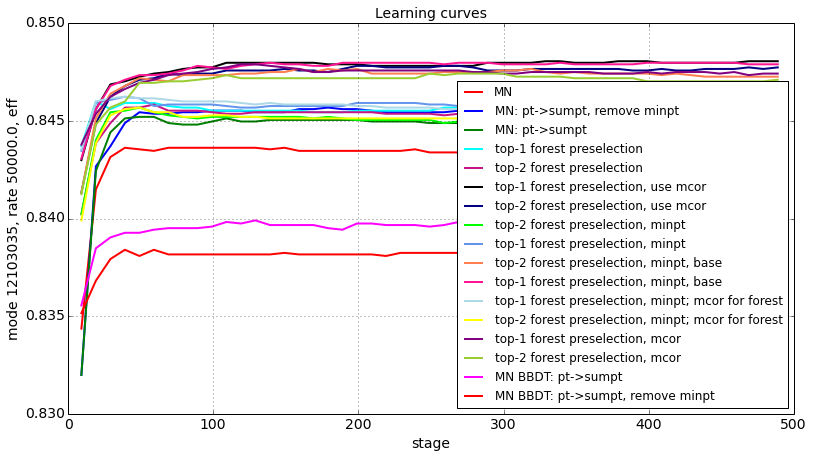

In [98]:
for n, elem in enumerate(staged_eff_plots):
    elem.plot(new_plot=True)

# Roc by events

### use not passed events, unnormed

In [99]:
not_passed_event_sig = 0
not_passed_event_bck = (total_bck_events - total_bck_events_presel) // 2

for mode in sig_train_modes_names:
    not_passed_event_sig += (total_signal_events_by_mode[mode] - total_signal_events_by_mode_presel[mode]) // 2

In [100]:
plots = OrderedDict()
for key, value in est.items() + compare_hierarhical.items():
    plots[key] = plot_roc_events(value, ds_test_signal, ds_test_bck, key, False, not_passed_event_sig,
                                 not_passed_event_bck)

MN AUC: 0.864113294573
MN: pt->sumpt, remove minpt AUC: 0.864273024603
MN: pt->sumpt AUC: 0.864540490078
top-1 forest preselection AUC: 0.864458392544
top-2 forest preselection AUC: 0.864470526734
top-1 forest preselection, use mcor AUC: 0.867748041709
top-2 forest preselection, use mcor AUC: 0.867691859529
top-2 forest preselection, minpt AUC: 0.864698901104
top-1 forest preselection, minpt AUC: 0.864707270238
top-2 forest preselection, minpt, base AUC: 0.867694194127
top-1 forest preselection, minpt, base AUC: 0.867745266495
top-1 forest preselection, minpt; mcor for forest AUC: 0.864694811015
top-2 forest preselection, minpt; mcor for forest AUC: 0.864682992927
top-1 forest preselection, mcor AUC: 0.867739657067
top-2 forest preselection, mcor AUC: 0.867688073614
MN: pt->sumpt AUC: 0.864540490078
MN BBDT: pt->sumpt AUC: 0.86414890354
MN: pt->sumpt, remove minpt AUC: 0.864273024603
MN BBDT: pt->sumpt, remove minpt AUC: 0.863870455117


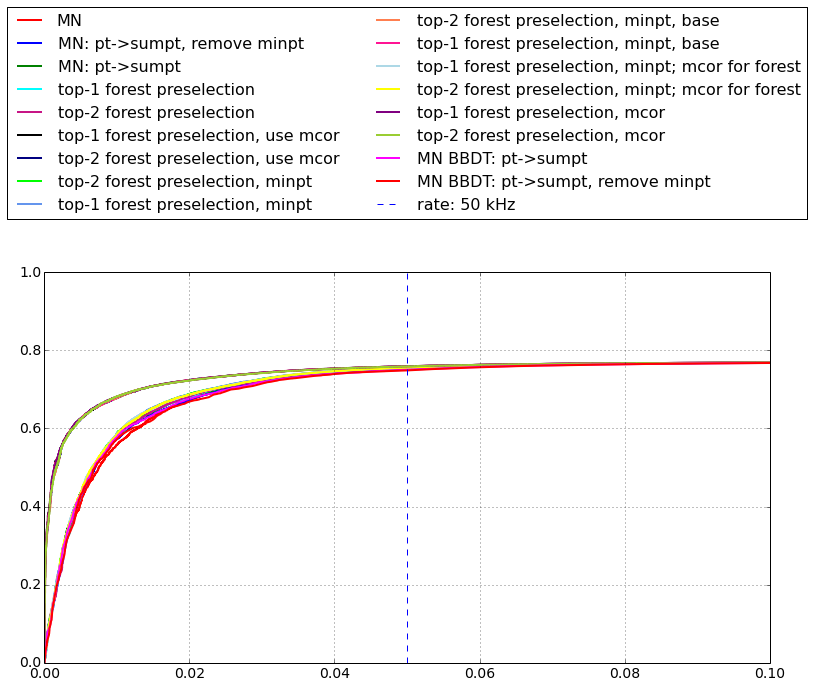

In [101]:
from rep.plotting import FunctionsPlot
FunctionsPlot(plots).plot(new_plot=True, xlim=(0, 0.1), ylim=(0., 1))
plot([1. * events_pass['50000.0-MN'] / (statistic_length(ds_test_bck)['Events'] + not_passed_event_bck)] * 2, [0., 1], 'b--', label='rate: 50 kHz')
lgd = legend(loc='upper center', fontsize=16, bbox_to_anchor=(0.5, 1.7), ncol=2)

## Normed each signal channel proportion

In [109]:
plots = OrderedDict()
for key, value in est.items() + compare_hierarhical.items():
    plots[key] = plot_roc_events(value, ds_test_signal, ds_test_bck, key)

MN AUC: 0.896901106839
MN: pt->sumpt, remove minpt AUC: 0.895331858542
MN: pt->sumpt AUC: 0.899213091883
top-1 forest preselection AUC: 0.896350673831
top-2 forest preselection AUC: 0.896370317685
top-1 forest preselection, use mcor AUC: 0.916144022022
top-2 forest preselection, use mcor AUC: 0.915082331515
top-2 forest preselection, minpt AUC: 0.899628240493
top-1 forest preselection, minpt AUC: 0.90010344537
top-2 forest preselection, minpt, base AUC: 0.915437157079
top-1 forest preselection, minpt, base AUC: 0.916343130455
top-1 forest preselection, minpt; mcor for forest AUC: 0.900417428339
top-2 forest preselection, minpt; mcor for forest AUC: 0.899571457157
top-1 forest preselection, mcor AUC: 0.912635214911
top-2 forest preselection, mcor AUC: 0.9120341032
MN: pt->sumpt AUC: 0.899213091883
MN BBDT: pt->sumpt AUC: 0.893164462992
MN: pt->sumpt, remove minpt AUC: 0.895331858542
MN BBDT: pt->sumpt, remove minpt AUC: 0.889448537654


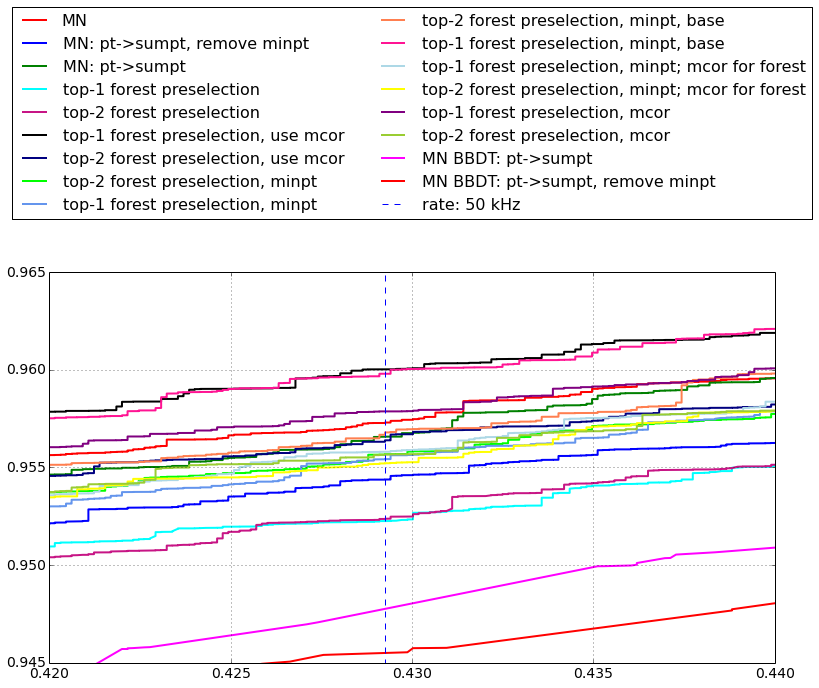

In [111]:
FunctionsPlot(plots).plot(new_plot=True, xlim=(0.42, 0.44), ylim=(0.945, 0.965))
plot([1. * events_pass['50000.0-MN'] / statistic_length(ds_test_bck)['Events']] * 2, [0., 1], 'b--', label='rate: 50 kHz')
lgd = legend(loc='upper center', fontsize=16, bbox_to_anchor=(0.5, 1.7), ncol=2)

## Unnormed each signal channel proportion

In [105]:
plots_unnormed = OrderedDict()
for key, value in est.items() + compare_hierarhical.items():
    plots_unnormed[key] = plot_roc_events(value, ds_test_signal, ds_test_bck, key, normed_channels=False)

MN AUC: 0.922813122724
MN: pt->sumpt, remove minpt AUC: 0.924596862336
MN: pt->sumpt AUC: 0.927583706847
top-1 forest preselection AUC: 0.926666906024
top-2 forest preselection AUC: 0.926802411139
top-1 forest preselection, use mcor AUC: 0.963403126138
top-2 forest preselection, use mcor AUC: 0.962775727645
top-2 forest preselection, minpt AUC: 0.929352716862
top-1 forest preselection, minpt AUC: 0.929446176792
top-2 forest preselection, minpt, base AUC: 0.962801798604
top-1 forest preselection, minpt, base AUC: 0.963372134726
top-1 forest preselection, minpt; mcor for forest AUC: 0.929307041964
top-2 forest preselection, minpt; mcor for forest AUC: 0.929175066829
top-1 forest preselection, mcor AUC: 0.963309493039
top-2 forest preselection, mcor AUC: 0.962733449519
MN: pt->sumpt AUC: 0.927583706847
MN BBDT: pt->sumpt AUC: 0.923210775718
MN: pt->sumpt, remove minpt AUC: 0.924596862336
MN BBDT: pt->sumpt, remove minpt AUC: 0.920101282256


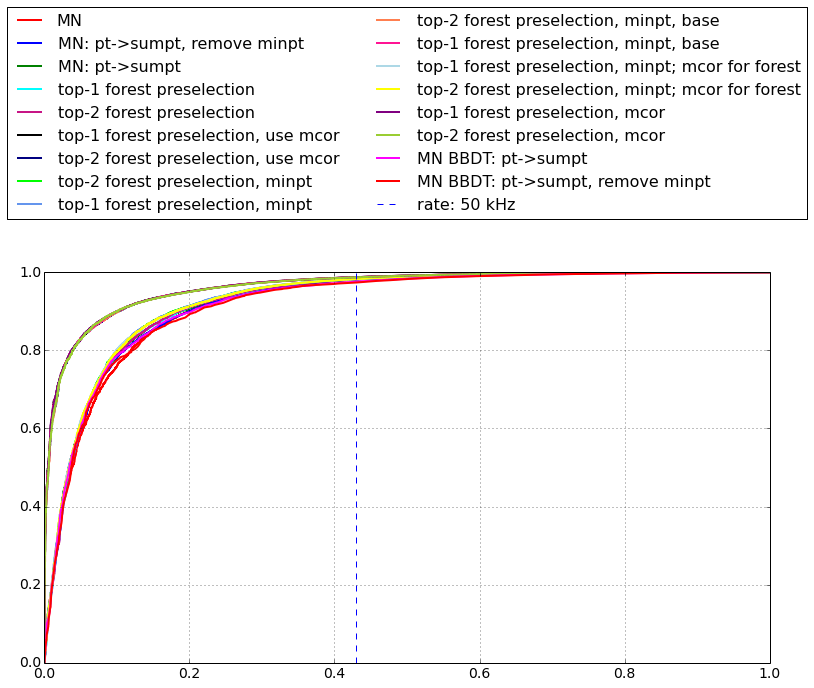

In [106]:
from rep.plotting import FunctionsPlot
FunctionsPlot(plots_unnormed).plot(new_plot=True, xlim=(0, 1), ylim=(0., 1))
plot([1. * events_pass['50000.0-MN'] / statistic_length(ds_test_bck)['Events']] * 2, [0., 1], 'b--', label='rate: 50 kHz')
lgd = legend(loc='upper center', fontsize=16, bbox_to_anchor=(0.5, 1.7), ncol=2)

# Save trees

In [107]:
with open("bbdt_run2/hlt1_borders_sumpt.mx", "w") as f:
    f.write(estimators['MN BBDT: pt->sumpt'].formula_mx)

In [108]:
with open("bbdt_run2/hlt1_borders_minpt.mx", "w") as f:
    f.write(estimators['MN BBDT: pt->sumpt, remove minpt'].formula_mx)